# Unsupervised Learning

### Creating Customer Segments

In this notebook, we will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

**Description of Categories**
- FRESH: annual spending (m.u.) on fresh products (Continuous)
- MILK: annual spending (m.u.) on milk products (Continuous)
- GROCERY: annual spending (m.u.) on grocery products (Continuous)
- FROZEN: annual spending (m.u.)on frozen products (Continuous) 
- DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
- DELICATESSEN: annual spending (m.u.) on and delicatessen products (Continuous)

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import renders as rs
%matplotlib inline
sns.set()

In [2]:
#Import Dataset and create a copy of it
data = pd.read_csv('customers.csv')
df = data.copy()
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
#Dropping 'Region' and 'Channel' column
df.drop(['Region', 'Channel'], axis=1, inplace=True)

In [4]:
#Display first five rows
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [5]:
#Display last five rows
df.tail()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125
439,2787,1698,2510,65,477,52


In [6]:
#Checking the number of rows and columns
df.shape

(440, 6)

In [7]:
#Checking data types of all columns
df.dtypes

Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicatessen        int64
dtype: object

In [8]:
#Check for any missing values
df.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

## Data Exploration

In [9]:
#Checking summary statistics. The resultant DataFrame is stored in a new variable named 'stats'
stats = df.describe()
stats

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Note:** The dataset appears to be **highly skewed** in the order **Mean > Median**, which shows that this is **Right/Positively skewed** data.

In [11]:
#Selecting 3 random samples and assigning it to a list
indices = [62, 378, 436]

**These samples will be separated into another dataframe for finding out the details the type of customer each of the selected respresents**

In [12]:
#Make a dataframe of selected indices
samples = pd.DataFrame(df.iloc[indices], columns = df.columns)

In [13]:
#Display dataframe
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
62,7823,6245,6544,4154,4074,964
378,3225,3294,1902,282,68,1114
436,39228,1431,764,4510,93,2346


**Now, the selected sample values should be ranked amongst the whole of the data values to check their ranks and get a better understanding of spending of each sample/customer in each category**

In [14]:
percentiles = df.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
percentiles

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
62,47.3,69.3,60.0,78.6,76.1,50.0
378,25.9,46.6,19.1,10.2,5.5,56.6
436,95.9,23.0,4.5,80.9,9.2,83.6


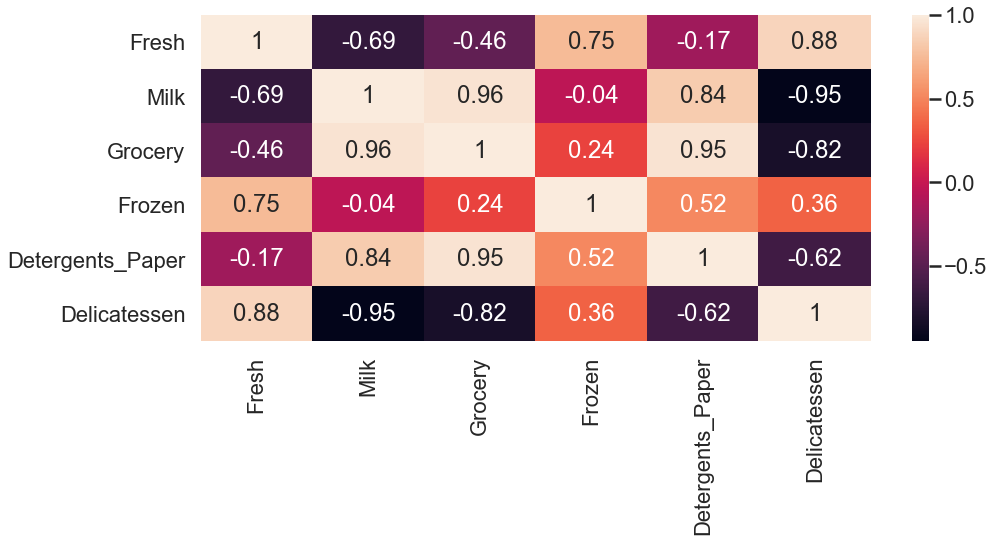

In [65]:
#Draw a heatmap to show the above results achieved in percentile
sns.set_context('poster')
plt.figure(figsize=(15,6))
sns.heatmap(percentiles.corr(), annot=True);

**Note**: Correlation between Fresh, Frozen and Delicatessen is positive, so this is **type 1** of customers who bought Fresh, Frozen and Delicatessen items from a **big store** and correlation between Milk, Grocery and Detergents_Paper is negative, so it represents **type 2** of customers who bought Milk, Groceries and Detergents_Paper from a **small shop**.

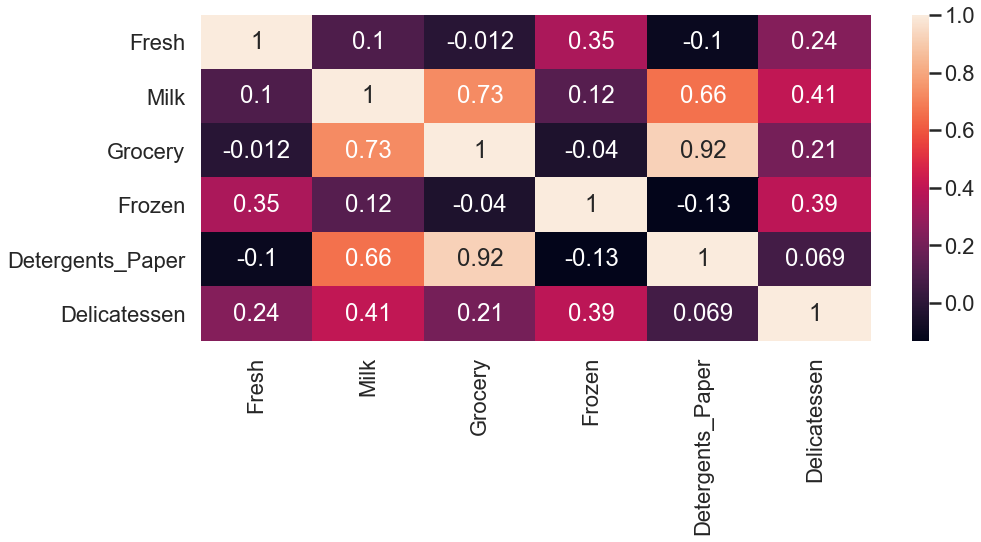

In [16]:
#Finding the correlation among all the variables of whole dataframe
sns.set_context('poster')
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True);

**Note:** The following inferences can be made:
1. High Correlation (Sold well together)
        a. Grocery and Detergents_Paper
        b. Milk and Detergents_Paper
        c. Milk and Grocery
2. Moderate Correlation
        a. Fresh and Milk
        b. Fresh and Frozen
        c. Fresh and Delicatessen
        d. Milk and Frozen
        e. Milk and Delicatessen
        f. Grocery and Delicatessen
        g. Frozen and Delicatessen
        h. Detergents_Paper and Delicatessen
3. Negative Correlation (Did not sell together)
        a. Fresh and Grocery
        b. Fresh and Detergents_Paper
        c. Grocery and Frozen
        d. Frozen and Detergents_Paper

### Pair Plot

Pairplot is a plot which is used to give and over view of the data in a graphical grid form. The result it shows gives us a picture of variables themselves in a graphical way as well as a relationship of one variable with all the others. For more details you can [click here](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

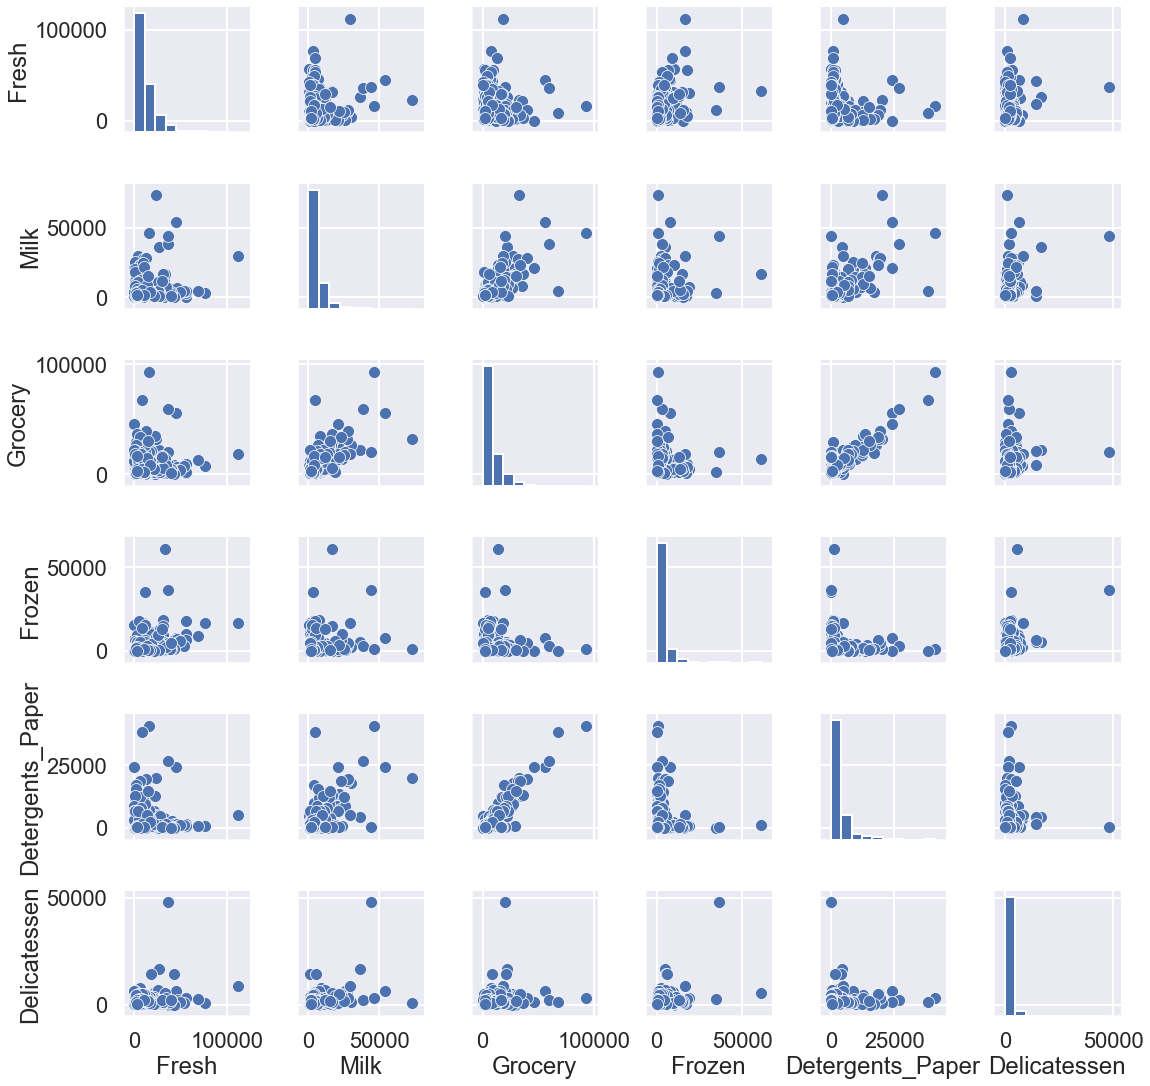

In [17]:
#Using Seaborn to make a pairplot
sns.pairplot(df);

**Note:** The plots above show all features have a **large number of data points near 0** along with some **outliers having very large** value e.g **Delicatessen**. This shows that our dataset is indeed **right/positively skewed**. 

## Data Preprocessing
In this section,we will preprocess the data to create a better representation of customers by normalizing it by **removing skewness** and **detecting (and optionally removing) outliers**. 

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling.

In [18]:
#Applying log on data for transforming it from skewed to normalized form
log_data = np.log(df)
log_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

Now we shall implement the following:
 - Assign the value of the 25th percentile for the given feature to Q1 using `np.percentile`.
 - Assign the value of the 75th percentile for the given feature to Q3 using `np.percentile`.
 - Assign the calculation of an IQR for the given feature.
 - Query the data to filter out Outliers using IQR
 - remove data points from the dataset by adding indices to the outliers list

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points! 

Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [19]:
outliers=[]
#For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    #Calculating Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    #Calculating Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    #Using the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    #Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    out=log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(out)
    outliers=outliers+list(out.index.values)
    
#Select the indices for data points to be removed
outliers = list(set([x for x in outliers if outliers.count(x) > 1]))    
print ("Outliers: {}".format(outliers))

#Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Outliers: [128, 65, 66, 75, 154]


**Note:** The Outliers list containing the datapoints 65, 66, 128, 154 and 75 are considered as outliers for multiple features and these datapoints should be removed from our data or else they end up influencing our clustering algorithm results e.g Kmeans will try to incorporate these points within the clusters and give less accurate results.

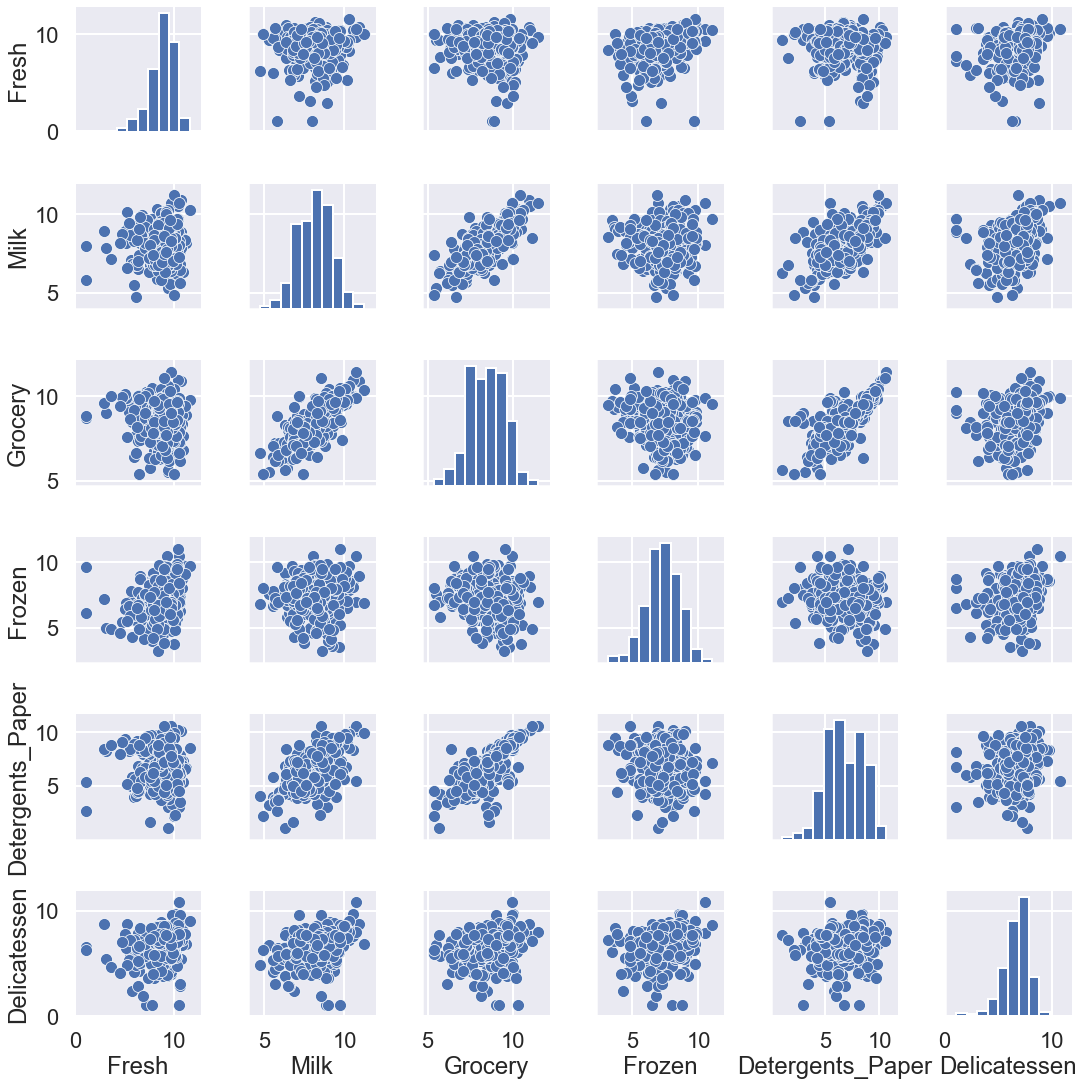

In [20]:
#Making a pairplot to check changes in data after scaling and outlier removal
sns.pairplot(good_data);

## Feature Transformation
Now we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In [21]:
#Import PCA Library
from sklearn.decomposition import PCA

In [22]:
#Create instance of PCA
pca_ = PCA()

In [23]:
#Training PCA
pca_.fit(good_data)

PCA()

In [25]:
#Generate PCA results to understand the Variance
pca_results = rs.pca_results(good_data, pca_)
pca_results

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


In [26]:
#Finding the cummulative explained variance
cumsum_pca_results = pca_results['Explained Variance'].cumsum().reset_index(name = 'Cumulative Explained Variance')
cumsum_pca_results

,index,Cumulative Explained Variance
0,Dimension 1,0.4430
1,Dimension 2,0.7068
2,Dimension 3,0.8299
3,Dimension 4,0.9311
4,Dimension 5,0.9796
5,Dimension 6,1.0000


**Note:** The first and second principal components explain **0.7068** variance of our data. The first 4 components explain **0.9311** variance of our data. 2 components should be selected for reducing the dimensions as they explain nearly 0.7068 variance of our data and if we opt for 3 or 4 components then they explain 0.8299 and 0.9311 variance of data respectively, which is not a very significant increase from 0.7068

### Implementation: Dimensionality Reduction

In [30]:
#Apply PCA by fitting the good data with the selected number of components
pca = PCA(n_components = 2)
pca.fit(good_data)

PCA(n_components=2)

In [31]:
#Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

In [32]:
#Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])
reduced_data.head()

,Dimension 1,Dimension 2
0,-1.757983,0.009711
1,-1.788665,-0.812251
2,-1.883353,-1.599135
3,1.155265,-1.405201
4,-0.784786,-2.394294


## Implementation: Creating Clusters

Now we will choose to use either a K-Means clustering algorithm or hierarchical clustering to identify the various customer segments hidden in the data and then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

## Choosing K

**Before Implementing KMeans and hierarchical clustering, we shall choose the optimal K using the following method**

- Silhouette Score

### Silhouette Score for K-Means

In [34]:
#Import necessary libraries
from sklearn.cluster import KMeans

In [35]:
# Import necessary libraries
from sklearn.metrics import silhouette_score

In [36]:
#Check Silhouette Score for finding Optimal K
s_score = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(reduced_data)
    s_score.append([k, silhouette_score(reduced_data, kmeans.labels_)])

In [37]:
s_score

[[2, 0.42628101546910835],
 [3, 0.39689092644980506],
 [4, 0.3320095826820278],
 [5, 0.3509907789312651],
 [6, 0.3666089873432108],
 [7, 0.363315403844963],
 [8, 0.35099406993457966],
 [9, 0.3541410898467623],
 [10, 0.3510037480942147],
 [11, 0.35193038325547465],
 [12, 0.3508854952847517],
 [13, 0.35963441956055836],
 [14, 0.3611341148230508]]

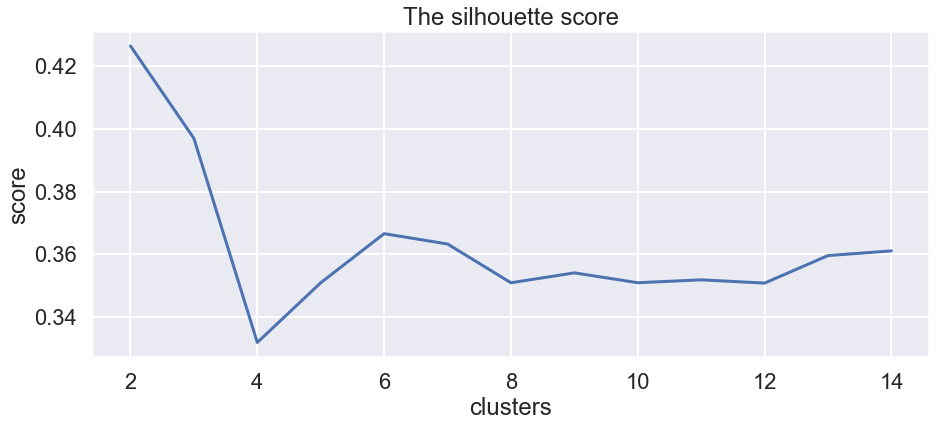

In [38]:
#Plot a graph representing the Silhouette Score.
plt.figure(figsize=(15,6))
sns.set_context('poster')
plt.plot( pd.DataFrame(s_score)[0], pd.DataFrame(s_score)[1])
plt.xlabel('clusters')
plt.ylabel('score')
plt.title('The silhouette score') 
plt.show()

### Silhouette Score for Hierarchical Clustering

In [39]:
#Import necessary libraries
from sklearn.cluster import AgglomerativeClustering

In [40]:
#Calculate silhouette score for each hierarchical clustering
s_score_hier = []
for h in range(2, 15):
    ward = AgglomerativeClustering(n_clusters=h).fit(reduced_data)
    s_score_hier.append([h, silhouette_score(reduced_data, ward.labels_)])

In [41]:
s_score_hier

[[2, 0.37506864833503123],
 [3, 0.36013962293428176],
 [4, 0.27162388334400245],
 [5, 0.2824756004966861],
 [6, 0.3073114549057678],
 [7, 0.31286252818634636],
 [8, 0.31851649864754333],
 [9, 0.31038876898672635],
 [10, 0.3205662351656815],
 [11, 0.32073534064762443],
 [12, 0.31447352700124637],
 [13, 0.3171948392269056],
 [14, 0.3216490562650799]]

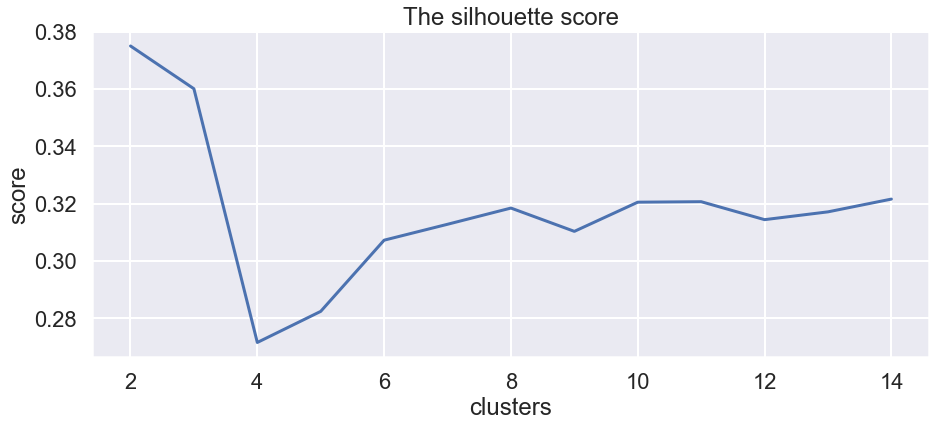

In [42]:
#Make a plot for silhouette score of hierarchical clustering
plt.figure(figsize=(15,6))
sns.set_context('poster')
plt.plot( pd.DataFrame(s_score_hier)[0], pd.DataFrame(s_score_hier)[1])
plt.xlabel('clusters')
plt.ylabel('score')
plt.title('The silhouette score') 
plt.show()

**Note:** For both Kmeans and Hierarchical clustering the number of clusters tested was from 2 till 15 clusters. Of these, the best silhouette score was achieved with 2 clusters which was 0.42 for Kmeans and 0.37 for Hierarchical clustering.

## Implementation of K-Means

In [43]:
#Implementing KMeans using the choosen K
kmean = KMeans(n_clusters = 2, random_state = 0)

#fit the reduced data
kmean.fit(reduced_data)

KMeans(n_clusters=2, random_state=0)

In [44]:
#Getting predictions
preds = reduced_data.copy()
preds['kmean'] = kmean.labels_

#Display value counts
preds['kmean'].value_counts()

0    258
1    177
Name: kmean, dtype: int64

## Implementation Hierarchical Clustering

In [45]:
#Implement Hierarchical(agglomerative) clustering using the chosen K
a_cluster = AgglomerativeClustering(n_clusters=2)

In [46]:
#Getting predictions
preds_agg = a_cluster.fit_predict(reduced_data)

## Best Clustering Algorithm?

**We will use** `adjusted rand index` **to select the best clustering algorithm by comparing each of the calculated labels with actual labels found in** `data['Channel]`.

**Before calculating the score, we need to make sure that the shape of true labels is consistent with the resultant labels.**

In [47]:
true_labels = data['Channel'].drop(data['Channel'].index[outliers]).reset_index(drop = True)

### Finding the adjusted rand index for K-Means and Agglomerative Clustering

In [48]:
#Import necessary libraries
from sklearn.metrics import adjusted_rand_score

In [49]:
kmeans_score = adjusted_rand_score(true_labels, kmean.labels_)
print ('The score for Kmeans is ',kmeans_score)

The score for Kmeans is  0.6048595350282511


In [50]:
aggl_score = adjusted_rand_score(true_labels, preds_agg)
print ('The score for Agglomerative Clustering is ', aggl_score)

The score for Agglomerative Clustering is  0.43916115962628266


**Note:** **Kmeans** has the best adjusted rand index score which is 0.6048595350282511

## Visualizing the clusters

In [51]:
#Getting the centers for KMeans
centers = kmean.cluster_centers_
centers

array([[ 1.49093664, -0.10743169],
       [-2.17322969,  0.15659534]])

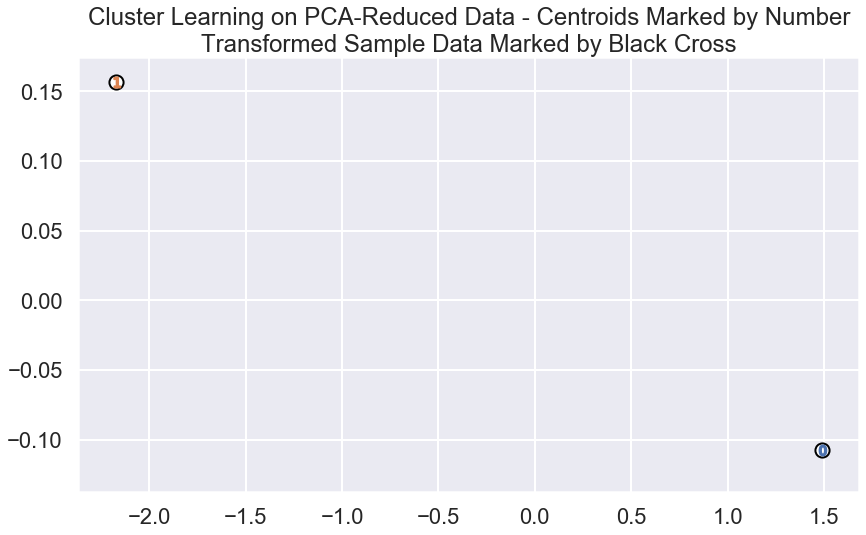

In [52]:
rs.cluster_results(reduced_data, preds, centers)

# Profiling

In [53]:
df_pred = df.drop(df.index[outliers]).reset_index(drop = True)
df_pred['pred'] = preds['kmean']

In [54]:
df_pred.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,pred
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,1


**Getting the average prices for each category from the original data frame for each cluster and then make a profile for each**

In [57]:
clustered_avg = df_pred.groupby('pred')['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'].median().reset_index()
clustered_avg

C:\Users\Fahad\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,pred,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0,10650.0,1916.5,2466.5,2277.5,322.0,788.0
1,1,5531.0,7504.0,11522.0,1059.0,4595.0,1338.0


### Make a radar chart to show a better profile for each cluster

In [58]:
#Import the library files for plotly and set your credentials
import chart_studio
chart_studio.tools.set_credentials_file(username='mfahad96', api_key='1MjYoH2f81BayK9nhjnw')

In [59]:
import chart_studio.plotly as py
import plotly.graph_objs as go

In [60]:
#Making the data set for radar chart
radar_data = [
    go.Scatterpolar(
      r = list(clustered_avg.loc[0,['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen', 'Fresh']]),
      theta = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen', 'Fresh'],
      fill = None,
      fillcolor=None,
      name = 'Cluster 0'
    ),
    go.Scatterpolar(
      r = list(clustered_avg.loc[1,['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen', 'Fresh']]),
      theta = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen', 'Fresh'],
      fill = None,
      fillcolor=None,
      name = 'Cluster 1'
    )
]

In [62]:
#Setting the layout for the radar plot and then generate the plot
radar_layout = go.Layout(polar = dict(radialaxis = dict(visible = True,range = [0, 12000])), showlegend = True)

In [63]:
#Generating plot
fig = go.Figure(data=radar_data, layout=radar_layout)
py.iplot(fig, filename = "radar")

**Note:** 
- Customers from Cluster 0 spent above average on Fresh and Frozen and below average on Milk, Grocery, Detergents_Paper and Delicatessen items. 
- Customers in Cluster 1 spent above average on Grocery, Milk, Detergents_Paper and Delicatessen and below average on Fresh and Frozen items.
**Based on these facts, we can infer that Cluster 0 is a hotel or resturaunt while Cluster 1 is a retail store**

## Conclusion

In this final section, we will investigate ways to make use of the clustered data. First, we will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, we will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, we will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

**Running the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'`**

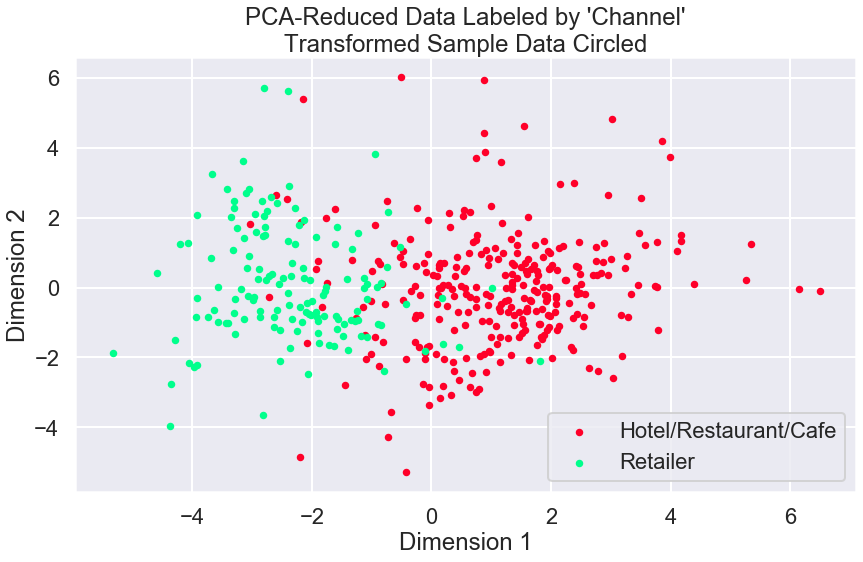

In [64]:
#Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers)

**Note:** 
- The clustering algorithm(Kmeans) and number of clusters(2) chosen represent the distribution of Hotel and Retail customers fairly well. According to our results above **Cluster 0 was centered at 1.49093664,-0.10743169** which is a fairly good center point for the hotel customers, whereas **Cluster 1 was centered at -2.17322969,0.15659534** and gives a very good central point for the retail customers.
- Since we have specified the number of clusters as 2, Kmeans will detect customers as purely 'retailers' or 'hotels'.
- These classifications are fairly consistent with our definition of the customer segments, however the data points which are far from their respective central points may end up being misclassified.